In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

In [2]:
data = pd.read_csv("data.csv")
data.head()

name        artist                             track_URI  \
0  ...Ready For It?  Taylor Swift  spotify:track:7zgqtptZvhf8GEmdsM2vp2   
1      Life Changes  Thomas Rhett  spotify:track:4Vxu50qVrQcycjRyJQaZLC   
2         24K Magic    Bruno Mars  spotify:track:6b8Be6ljOzmkOmFslEb23P   
3       Galway Girl    Ed Sheeran  spotify:track:0afhq8XCExXpqazXczTSve   
4        Photograph    Ed Sheeran  spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0665         0.615   0.779          0.000000    0.1550    -6.454   
1        0.1000         0.687   0.845          0.000000    0.0452    -4.370   
2        0.0340         0.818   0.803          0.000000    0.1530    -4.282   
3        0.0735         0.624   0.876          0.000000    0.3270    -3.374   
4        0.6070         0.614   0.379          0.000464    0.0986   -10.480   

   speechiness    tempo  valence                                     playlist  
0       0.1350  160.000    0.453  The Longest Playlist on Spotify® (Official)  
1       0.0576   87.972    0.809  The Longest Playlist on Spotify® (Official)  
2       0.0797  106.970    0.632  The Longest Playlist on Spotify® (Official)  
3       0.1000   99.943    0.781  The Longest Playlist on Spotify® (Official)  
4       0.0476  107.989    0.201  The Longest Playlist on Spotify® (Official)

In [3]:
data.shape

(12138, 13)

In [4]:
data.isna().sum()

name                2
artist              2
track_URI           0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
playlist            0
dtype: int64

In [5]:
for i in data['track_URI'].value_counts():
    if i!=1:
        print(i)

In [6]:
data['artist'].value_counts()

Taylor Swift         155
Lacuna Coil           73
Charlie Brown         70
The Neighbourhood     65
Flyleaf               54
                    ... 
Phantogram             1
Eric Amarillo          1
James Hersey           1
Dawa                   1
girl in red            1
Name: artist, Length: 4111, dtype: int64

In [7]:
data.describe()

acousticness  danceability        energy  instrumentalness  \
count  12138.000000  12138.000000  12138.000000      12138.000000   
mean       0.249016      0.567235      0.645816          0.105665   
std        0.299363      0.163812      0.232343          0.254477   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.014100      0.465000      0.489000          0.000000   
50%        0.101000      0.579000      0.691000          0.000046   
75%        0.419000      0.686000      0.832000          0.011400   
max        0.995000      0.980000      1.000000          0.999000   

           liveness      loudness   speechiness         tempo       valence  
count  12138.000000  12138.000000  12138.000000  12138.000000  12138.000000  
mean       0.186278     -7.794664      0.068722    120.496019      0.461992  
std        0.155873      4.419630      0.072007     28.049141      0.246406  
min        0.000000    -53.436000      0.000000      0.000000      0.000000  
25%        0.095000     -9.347750      0.034100     99.979000      0.264000  
50%        0.122000     -6.631000      0.044200    119.998500      0.451000  
75%        0.227000     -4.921000      0.069700    137.911750      0.655000  
max        0.988000     -0.276000      0.957000    240.107000      0.990000

C:\Users\prana\AppData\Local\Temp\ipykernel_34924\1333459145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = "coolwarm")


<AxesSubplot: >

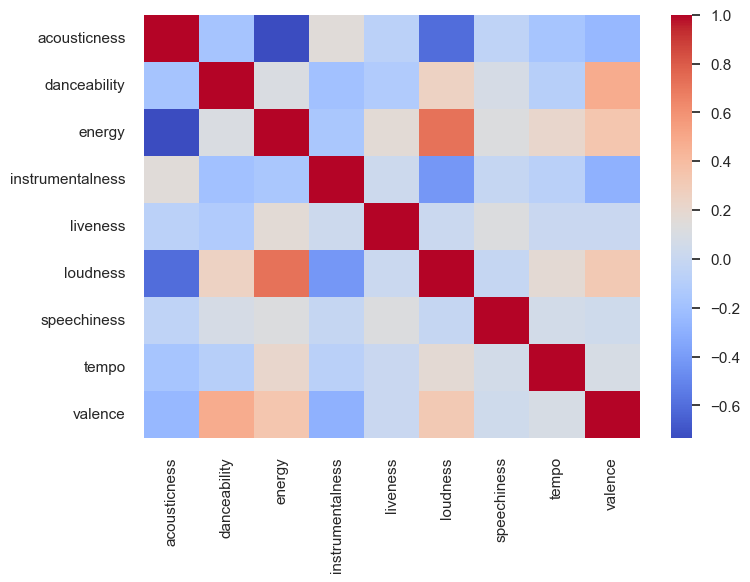

In [8]:
sns.heatmap(data.corr(), cmap = "coolwarm")

- The above heat map shows how strongly different numerical data correlates. The deep red shows strong positive relationships and the deep blue shows strong negative relationships. Some interesting correlations deserve a few comments.

- In another unsurprising trend, loudness correlates with energy. Intuitively, high energy songs radiate intensity, which often comes with loudness.

- Acousticness shares a few interesting negative relationships. Its inverse relationship with energy and loudness captures the idea of how most people image ballads.


## Principal Component Analysis (Kernel PCA)

In [3]:
df = data.copy()
non_features = ['name', 'artist', 'track_URI', 'playlist']
track_info = df[non_features]
df_X = df.drop(columns=non_features)
df_X.head()

acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0665         0.615   0.779          0.000000    0.1550    -6.454   
1        0.1000         0.687   0.845          0.000000    0.0452    -4.370   
2        0.0340         0.818   0.803          0.000000    0.1530    -4.282   
3        0.0735         0.624   0.876          0.000000    0.3270    -3.374   
4        0.6070         0.614   0.379          0.000464    0.0986   -10.480   

   speechiness    tempo  valence  
0       0.1350  160.000    0.453  
1       0.0576   87.972    0.809  
2       0.0797  106.970    0.632  
3       0.1000   99.943    0.781  
4       0.0476  107.989    0.201

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_X)

In [5]:
from sklearn.decomposition import KernelPCA


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
def my_scorer(estimator, X, y=None):
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -1 * mean_squared_error(X, X_preimage)

clf = KernelPCA(fit_inverse_transform=True, n_jobs=-1)

param_grid = [
    {
        'n_components': [10],
        'kernel': ['linear','poly','rbf','sigmoid'],
        'gamma': [0.03]
    }
]

grid_search2 = GridSearchCV(clf,param_grid, cv=3,n_jobs=-1,verbose=1,scoring=my_scorer)
grid_search2.fit(X_std)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [14]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
def my_scorer(estimator, X, y=None):
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -1 * mean_squared_error(X, X_preimage)

clf = KernelPCA(fit_inverse_transform=True, n_jobs=-1)

param_grid = [
    {
        'n_components': [5,7,9,10,25,50],
        'kernel': ['linear','poly','rbf','sigmoid'],
        'gamma': [0.03,0.1,1,10]
    }
]

grid_search = GridSearchCV(clf,param_grid, cv=3,n_jobs=-1,verbose=1,scoring=my_scorer)
grid_search.fit(X_std)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
255 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 500. MiB for an array with shape (8092, 8092) and data type float64

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\sklearn\model

GridSearchCV(cv=3, estimator=KernelPCA(fit_inverse_transform=True, n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'gamma': [0.03, 0.1, 1, 10],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'n_components': [5, 7, 9, 10, 25, 50]}],
             scoring=<function my_scorer at 0x00000270376AFC40>, verbose=1)

In [15]:
grid_search.best_params_ #result - {'gamma': 0.03, 'kernel': 'linear', 'n_components': 10}

{'gamma': 0.03, 'kernel': 'linear', 'n_components': 10}

In [22]:

kpca = KernelPCA(gamma=0.03,kernel="linear",n_components=10)
X_transformed = kpca.fit_transform(X_std)

X_transformed.shape

(12138, 10)

In [ ]:
kcomps = pd.DataFrame(X_transformed)
kcomps.columns =[ "Component"+str(i) for i in range(1,11)]

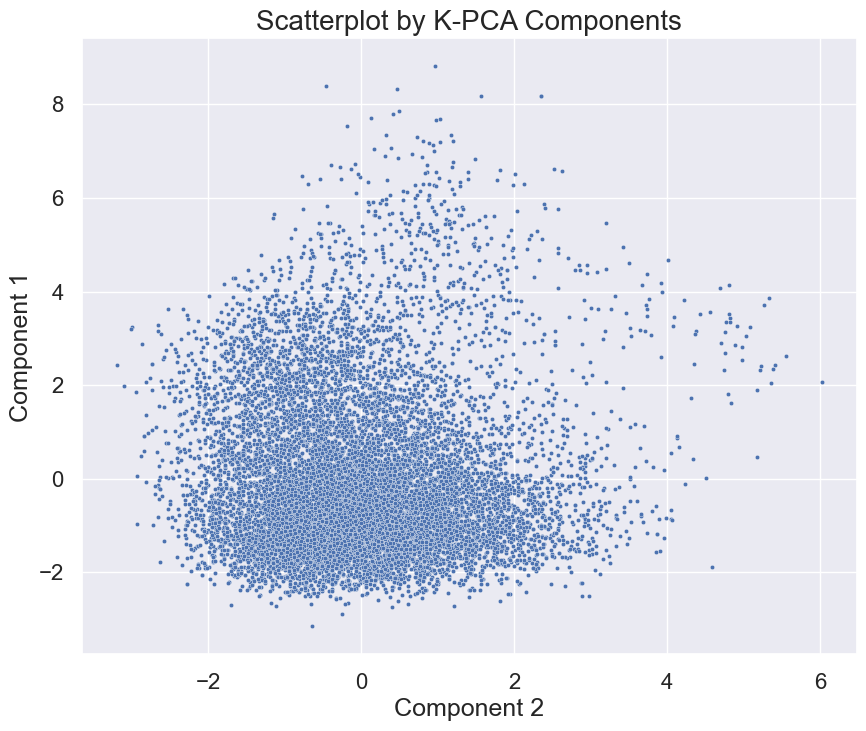

In [21]:

fig = plt.figure(figsize=(10, 8))
sns.scatterplot(kcomps,x = 'Component2', y='Component1',s=10)
plt.title('Scatterplot by K-PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("./visualizations/2-d-kpca-components.png")

In [ ]:
# 3 components
kpca = KernelPCA(gamma=0.03,kernel="linear",n_components=3)
X_transformed_3 = kpca.fit_transform(X_std)

x = df_seg_pca_kmeans['Component 1']
y = df_seg_pca_kmeans['Component 2']
z = df_seg_pca_kmeans['Component 3']
fig = plt.figure(figsize=(8,8))
plt.tight_layout()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,s=2)
ax.set_xlabel("Component 2",fontsize=12)
ax.set_ylabel("Component 1",fontsize=12)
ax.set_zlabel("Component 3",fontsize=12)
ax.set_title("3D Scatter Plot of Songs using PCA")
plt.savefig("visualizations/3-d-pca-components.png")

## K-Means Clustering

Finding the elbow point of the WCSS (within cluster sum of squares) curve using the YellowBrick `KElbowVisualizer`

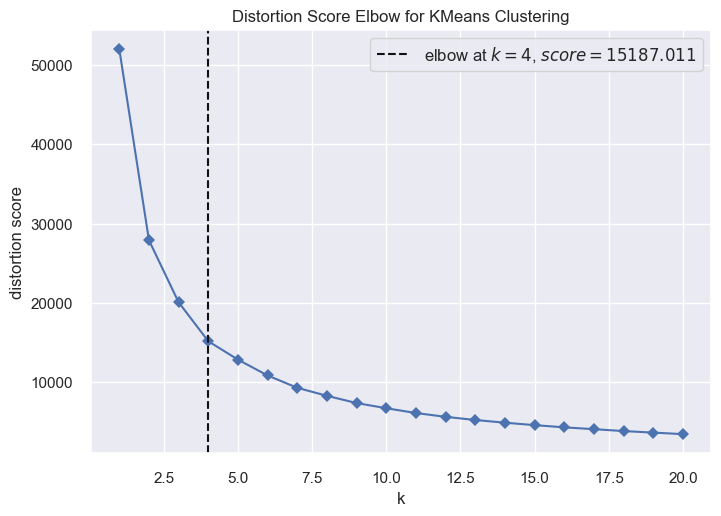

Optimal number of clusters: 4


In [29]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1,21), timings=False)
visualizer.fit(X_transformed)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

Finding the elbow point of the WCSS (within cluster sum of squares) curve using the kneed `KneeLocator`

In [30]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(X_transformed)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

Optimal number of clusters 4


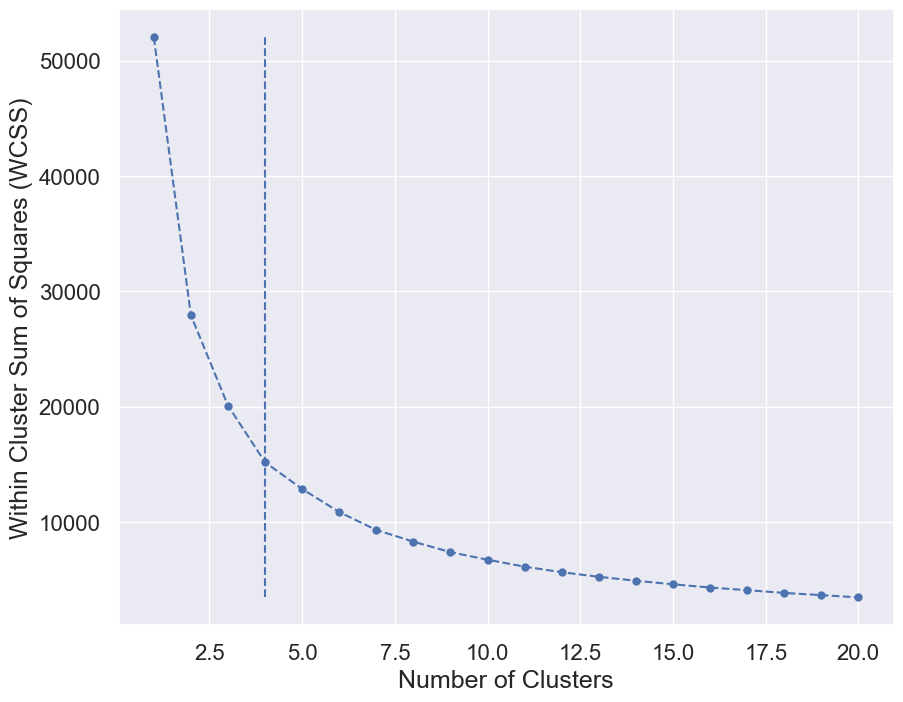

In [31]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./visualizations/num_clusters.png")
plt.show()

In [32]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(X_transformed);

## Analysis and Visualization

In [34]:
df_seg_pca_kmeans = pd.concat([df_X.reset_index(drop=True), pd.DataFrame(X_transformed)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*2):] = ["Component " + str(i+1) for i in range(2)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0665         0.615   0.779          0.000000    0.1550    -6.454   
1        0.1000         0.687   0.845          0.000000    0.0452    -4.370   
2        0.0340         0.818   0.803          0.000000    0.1530    -4.282   
3        0.0735         0.624   0.876          0.000000    0.3270    -3.374   
4        0.6070         0.614   0.379          0.000464    0.0986   -10.480   

   speechiness    tempo  valence  Component 1  Component 2  Cluster  
0       0.1350  160.000    0.453    -1.169497     0.510848        3  
1       0.0576   87.972    0.809    -1.583398    -1.435919        0  
2       0.0797  106.970    0.632    -1.717857    -1.088344        0  
3       0.1000   99.943    0.781    -1.869261    -0.140066        0  
4       0.0476  107.989    0.201     1.729481    -0.920606        2

C:\Users\prana\AppData\Local\Temp\ipykernel_27708\2503160053.py:4: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.scatterplot(df_seg_pca_kmeans,x = 'Component 2', y='Component 1',s=10, hue='Cluster', palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod', 'tab:cyan'])


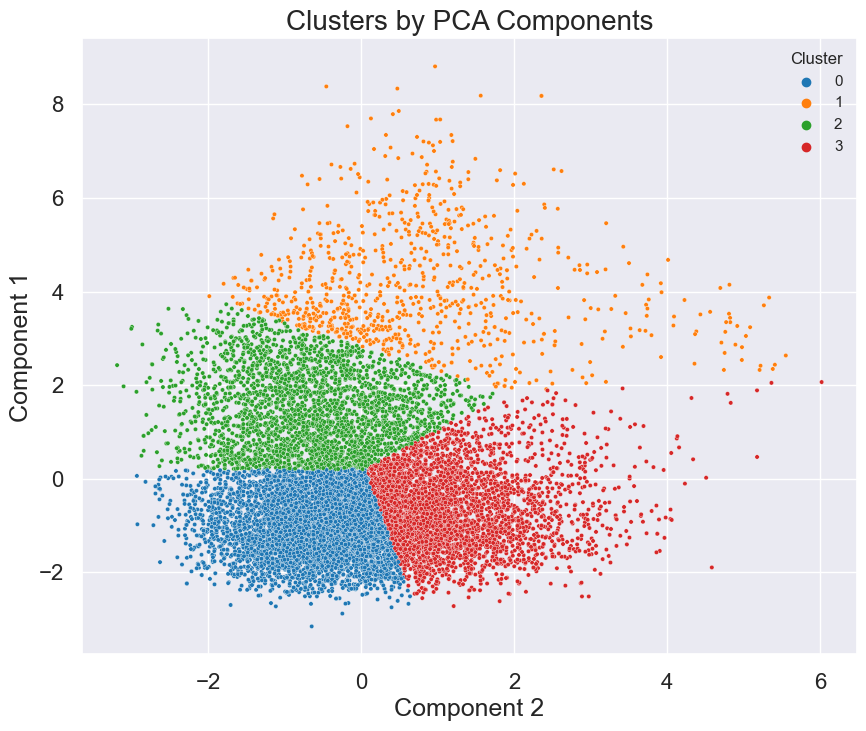

In [35]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(df_seg_pca_kmeans,x = 'Component 2', y='Component 1',s=10, hue='Cluster', palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod', 'tab:cyan'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("./visualizations/clusters-2d.png")

In [37]:
from sklearn.metrics import silhouette_score
silhouette_score(X_transformed, kmeans_pca.labels_)

0.3710175886844808

- A score close to 1 means that the clusters are dense and well separated
- A score around 0 indicates overlapping clusters
- A score close to -1 means incorrect clustering / number of clusters

In [39]:
from sklearn import metrics
metrics.calinski_harabasz_score(X_transformed,kmeans_pca.labels_)

9805.934719104613

In [40]:
df['Cluster'] = df_seg_pca_kmeans['Cluster']
df

name          artist  \
0           ...Ready For It?    Taylor Swift   
1               Life Changes    Thomas Rhett   
2                  24K Magic      Bruno Mars   
3                Galway Girl      Ed Sheeran   
4                 Photograph      Ed Sheeran   
...                      ...             ...   
12133                 Flemme          Angèle   
12134                  Sofia          Clairo   
12135                  Drama          Jesse®   
12136               DEVILISH  Chase Atlantic   
12137  Broken Smile (My All)        Lil Peep   

                                  track_URI  acousticness  danceability  \
0      spotify:track:7zgqtptZvhf8GEmdsM2vp2        0.0665         0.615   
1      spotify:track:4Vxu50qVrQcycjRyJQaZLC        0.1000         0.687   
2      spotify:track:6b8Be6ljOzmkOmFslEb23P        0.0340         0.818   
3      spotify:track:0afhq8XCExXpqazXczTSve        0.0735         0.624   
4      spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL        0.6070         0.614   
...                                     ...           ...           ...   
12133  spotify:track:2TL8q8EO60b9lWeozfqYnG        0.0575         0.757   
12134  spotify:track:7B3z0ySL9Rr0XvZEAjWZzM        0.5980         0.744   
12135  spotify:track:2GyQ3JeDSDgcHiVYZxjJ1u        0.2110         0.318   
12136  spotify:track:2yi1xYIc58dUibi3iMvqWl        0.0240         0.500   
12137  spotify:track:1BCBBO8VUEFOb6RBct4XDp        0.0459         0.545   

       energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0       0.779          0.000000    0.1550    -6.454       0.1350  160.000   
1       0.845          0.000000    0.0452    -4.370       0.0576   87.972   
2       0.803          0.000000    0.1530    -4.282       0.0797  106.970   
3       0.876          0.000000    0.3270    -3.374       0.1000   99.943   
4       0.379          0.000464    0.0986   -10.480       0.0476  107.989   
...       ...               ...       ...       ...          ...      ...   
12133   0.672          0.000349    0.1270    -8.776       0.0599  111.652   
12134   0.619          0.003720    0.2310    -9.805       0.0390  112.997   
12135   0.460          0.000000    0.1230    -8.729       0.0591  170.869   
12136   0.742          0.000119    0.2700    -5.527       0.5000  144.668   
12137   0.517          0.007240    0.1500    -8.681       0.0359  120.044   

       valence                                     playlist  Cluster  
0        0.453  The Longest Playlist on Spotify® (Official)        3  
1        0.809  The Longest Playlist on Spotify® (Official)        0  
2        0.632  The Longest Playlist on Spotify® (Official)        0  
3        0.781  The Longest Playlist on Spotify® (Official)        0  
4        0.201  The Longest Playlist on Spotify® (Official)        2  
...        ...                                          ...      ...  
12133    0.185                       low energy kinda mood📉        0  
12134    0.641                       low energy kinda mood📉        2  
12135    0.327                       low energy kinda mood📉        3  
12136    0.537                       low energy kinda mood📉        3  
12137    0.115                       low energy kinda mood📉        2  

[12138 rows x 14 columns]

In [41]:
def make_normalized_df(df, col_sep):
    non_features = df[df.columns[:col_sep]]
    features = df[df.columns[col_sep:]]
    norm = MinMaxScaler().fit_transform(features)
    scaled = pd.DataFrame(norm, index=df.index, columns = df.columns[col_sep:])
    return pd.concat([non_features, scaled], axis=1)

cluster_labels = df['Cluster']
orig = df.drop(columns=['playlist', 'Cluster'])
values_df = make_normalized_df(orig, 3)
values_df.insert(3, 'cluster', cluster_labels)
values_df.head()

name        artist                             track_URI  \
0  ...Ready For It?  Taylor Swift  spotify:track:7zgqtptZvhf8GEmdsM2vp2   
1      Life Changes  Thomas Rhett  spotify:track:4Vxu50qVrQcycjRyJQaZLC   
2         24K Magic    Bruno Mars  spotify:track:6b8Be6ljOzmkOmFslEb23P   
3       Galway Girl    Ed Sheeran  spotify:track:0afhq8XCExXpqazXczTSve   
4        Photograph    Ed Sheeran  spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL   

   cluster  acousticness  danceability  energy  instrumentalness  liveness  \
0        3      0.066834      0.627551   0.779          0.000000  0.156883   
1        0      0.100503      0.701020   0.845          0.000000  0.045749   
2        0      0.034171      0.834694   0.803          0.000000  0.154858   
3        0      0.073869      0.636735   0.876          0.000000  0.330972   
4        2      0.610050      0.626531   0.379          0.000464  0.099798   

   loudness  speechiness     tempo   valence  
0  0.883785     0.141066  0.666370  0.457576  
1  0.922987     0.060188  0.366387  0.817172  
2  0.924643     0.083281  0.445510  0.638384  
3  0.941723     0.104493  0.416244  0.788889  
4  0.808051     0.049739  0.449754  0.203030

In [42]:
fig = make_subplots(rows=2, cols=4, specs=[[{'type': 'polar'}]*4]*2)

angles = list(values_df.columns[4:])
angles.append(angles[0])

'''
A - Acousticness
D - Danceability
E - Energy
I - Instrumentalness
Li - Liveness
Lo - Loudness
S - Speechiness
T - Tempo
V - Valence
'''
abbrev = ["A", "D", "E", "I", "Li", "Lo", "S", "T", "V"]

layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))

for i in range(n_clusters):
    subset = values_df[values_df['cluster'] == i]
    data = [np.mean(subset[col]) for col in subset.columns[4:]]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=abbrev,
        fill='toself',
        name="Cluster " + str(i)),
        i // 4 + 1,
        i % 4 + 1)
    
fig.update_layout(
        polar=layoutdict,
        polar2=layoutdict,
        polar3=layoutdict,
        polar4=layoutdict,
        polar5=layoutdict,
        polar6=layoutdict,
        polar7=layoutdict,
        polar8=layoutdict,
        showlegend=True
        )
fig.show()
#     fig.write_image('./visualizations/cluster' + str(i) + '.png')

In [43]:
fig = go.Figure()

angles = list(values_df.columns[4:])
angles.append(angles[0])

layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))

for i in range(n_clusters):
    subset = values_df[values_df['cluster'] == i]
    data = [np.mean(subset[col]) for col in subset.columns[4:]]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=angles,
        fill='toself',
        name="Cluster " + str(i)))
    
fig.update_layout(
        polar=layoutdict,
        showlegend=True
        )
fig.show()
#     fig.write_image('./visualizations/cluster' + str(i) + '.png')

In [44]:
def inspect(df, param, cluster):
    plt.figure(figsize=(10,8))
    test_cluster = df.loc[df['Cluster'] == cluster]
    y = test_cluster[param]
    x = [i for i in range(len(y))]
    plt.bar(x, y)
    plt.xlabel('Track #', fontsize=18)
    plt.ylabel(param.title(), fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.hlines(np.mean(df[param]), 0, len(y))
    plt.show()

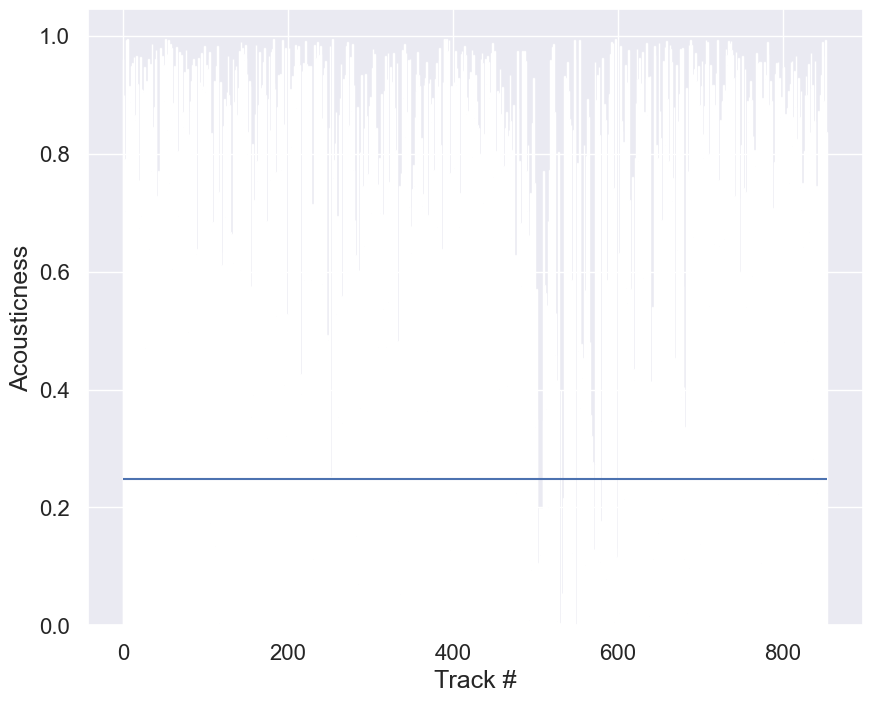

In [46]:
inspect(df, 'acousticness',1)

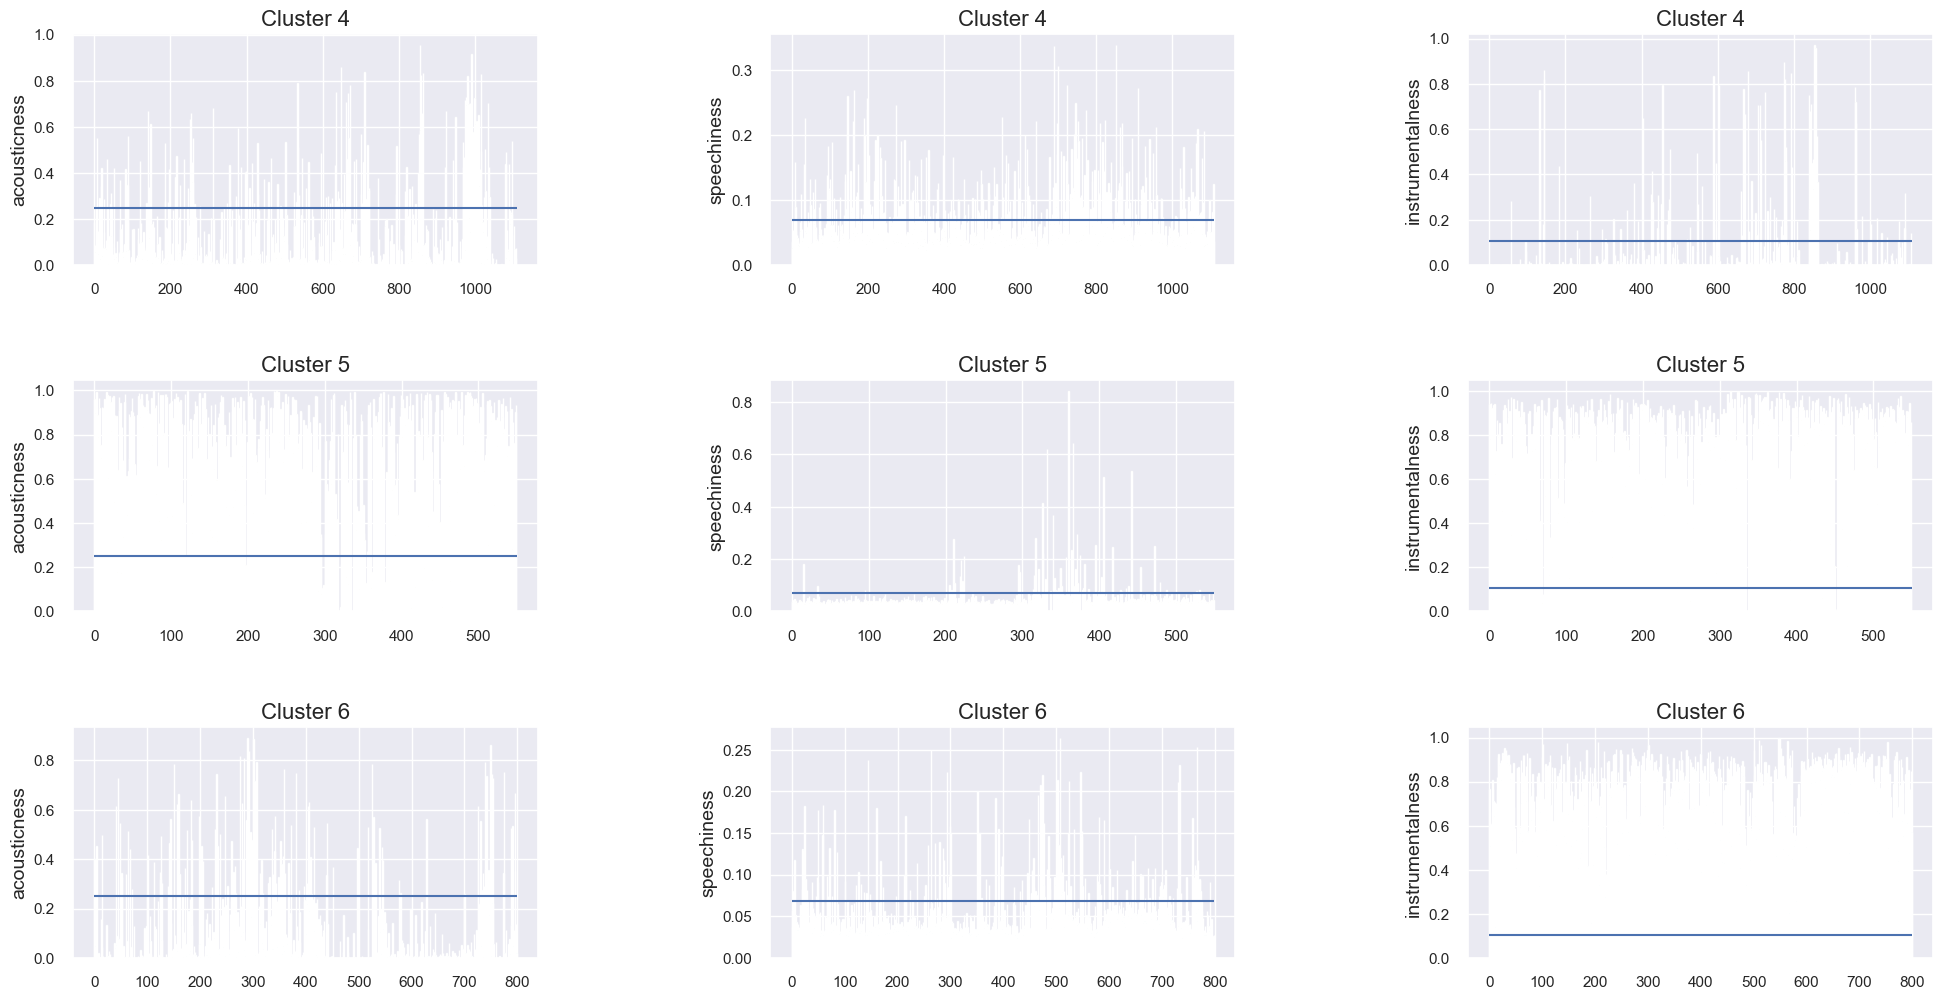

In [82]:
clusters = [4, 5, 6]
features = ["acousticness", "speechiness", "instrumentalness"]
colors = ['tab:green', 'tab:olive', 'tab:cyan']
dim = len(clusters)

fig, axes = plt.subplots(dim, dim, figsize=(24, 12))
i = 0
test_cluster = df.loc[df['Cluster'] == clusters[0]]
for ax in (axes.flatten()):
    if i % dim == 0 and i != 0:
        test_cluster = df.loc[df['Cluster'] == clusters[i // dim]]
    col = features[i % dim]
    y = test_cluster[col]
    x = [i for i in range(len(y))]
    ax.bar(x, y, color=colors[i//dim])
    ax.set_ylabel(col, fontsize=14)
    ax.set_title("Cluster " + str(clusters[i // dim]), fontsize=16)
    ax.hlines(np.mean(df[col]), 0, len(y))
    plt.subplots_adjust(wspace=.5, hspace=.5)
    i += 1
    
fig.savefig("./visualizations/cluster_feature_bar_charts_dim_3.png")

In [83]:
preview = df.loc[df['Cluster'] == 0]
print(len(preview))
preview.head(n=50)

2552


name                artist  \
0                            ...Ready For It?          Taylor Swift   
10                            Everybody Talks            Neon Trees   
12                                  Bad Blood          Taylor Swift   
20                             Wildest Dreams          Taylor Swift   
35                                       Roar            Katy Perry   
38            All These Things That I've Done           The Killers   
50                                       Mean          Taylor Swift   
64                    In Case You Didn't Know           Brett Young   
70                         I'll Name the Dogs         Blake Shelton   
73                              Kiss Somebody          Morgan Evans   
76   Meant to Be (feat. Florida Georgia Line)            Bebe Rexha   
77                           Getting Over You            Jackie Lee   
85                           Never Forget You          Zara Larsson   
91                                Coming Home   Diddy - Dirty Money   
94                                   Umbrella               Rihanna   
124                             Chicken Fried        Zac Brown Band   
126                               Wagon Wheel         Darius Rucker   
129                         Song of the South               Alabama   
135                                 Marry You            Bruno Mars   
137                      Versace on the Floor            Bruno Mars   
161                                 Piano Man            Billy Joel   
179            Waiting On the World to Change            John Mayer   
185        We Are Young (feat. Janelle Monáe)                  fun.   
187                      Titanium (feat. Sia)          David Guetta   
188               Live Your Life - Radio Edit           Headhunterz   
189                                  rockstar           Post Malone   
198                             Summer Of '69           Bryan Adams   
200                      Take It All Back 2.0      Judah & the Lion   
202                              Not Over You          Gavin DeGraw   
205                         She Will Be Loved              Maroon 5   
214                               Love Me Now           John Legend   
215                            Love Me Harder         Ariana Grande   
227                                        2U          David Guetta   
228        Despacito (Featuring Daddy Yankee)            Luis Fonsi   
231                           Where Are Ü Now              Skrillex   
233                               The Feeling         Justin Bieber   
240                                 Fireflies              Owl City   
247                                 The Climb           Miley Cyrus   
252                           Dangerous Woman         Ariana Grande   
263                               Bye Bye Bye                *NSYNC   
268                             Summer Of '69           Bryan Adams   
273                                Lego House            Ed Sheeran   
280                  Break Up In A Small Town              Sam Hunt   
283                          867-5309 / Jenny          Tommy Tutone   
289                           Everybody Talks            Neon Trees   
290                                 Sk8er Boi         Avril Lavigne   
293                                     Brave        Sara Bareilles   
304                    God, Your Mama, And Me  Florida Georgia Line   
309                         A Guy with a Girl         Blake Shelton   
310                     Song for Another Time          Old Dominion   

                                track_URI  acousticness  danceability  energy  \
0    spotify:track:7zgqtptZvhf8GEmdsM2vp2      0.066500         0.615   0.779   
10   spotify:track:3528IXKpbb7OMjdjWYlbfD      0.003010         0.471   0.924   
12   spotify:track:273dCMFseLcVsoSWx59IoE      0.087100         0.650   0.802   
20   spotify:track:59HjlYCeBsxdI0fcm3zglw      0.070200         0.554   0.666   
35   spotify:t